dataScience3.1practice

In [34]:
import torch


x = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
y = torch.FloatTensor([[1,2,3],[4,5,6],[7,8,9]])
print("x =", x)
print("y =", y)

print("Size:", x.size())
print("Shape:", x.shape)
print("차원(랭크):", x.ndimension())

x0 = torch.unsqueeze(x, 0)
x1 = torch.unsqueeze(x, 1)
x2 = torch.unsqueeze(x, 2)
print("x0.shape:", x0.shape)
print("x1.shape:", x1.shape)
print("x2.shape:", x2.shape)
print("x0 =", x0)
print("x1 =", x1)
print("x2 =", x2)

x3 = torch.squeeze(torch.squeeze(x0))
print("x3 =", x3)
print("x3.shape =", x3.shape)

x4 = x.view(9)
x5 = x.view(1,3,3)
print("x4 =", x4)
print("x5 =", x5)


x = tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
y = tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])
Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
차원(랭크): 2
x0.shape: torch.Size([1, 3, 3])
x1.shape: torch.Size([3, 1, 3])
x2.shape: torch.Size([3, 3, 1])
x0 = tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
x1 = tensor([[[1, 2, 3]],

        [[4, 5, 6]],

        [[7, 8, 9]]])
x2 = tensor([[[1],
         [2],
         [3]],

        [[4],
         [5],
         [6]],

        [[7],
         [8],
         [9]]])
x3 = tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
x3.shape = torch.Size([3, 3])
x4 = tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
x5 = tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])


In [35]:
x = torch.FloatTensor([[1,2],[3,4],[5,6]])
w = torch.randn(1,2,dtype=torch.float)
b = torch.randn(3,1,dtype=torch.float)

result = x@w.T+b
print(result)


tensor([[ 4.3628],
        [-0.0525],
        [ 1.5404]])


In [36]:
w = torch.tensor(1.0,requires_grad=True)
a = w*3
l = a**2
l.backward()
print("l을 w로 미분한 값은", w.grad)

l을 w로 미분한 값은 tensor(18.)


In [37]:

x_train = torch.FloatTensor([[1,2],[3,2],[3,7],[1,1],[1,0]])
y_train = torch.FloatTensor([[4],[8],[23],[1],[-2]])

w = torch.randn(2,1)
b = torch.randn(1,1)

lr = 0.01

for epoch in range(3001):
  w.requires_grad_(True)
  b.requires_grad_(True)

  h = x_train@w+b
  cost = torch.mean((h-y_train)**2)

  cost.backward()

  with torch.no_grad():
    w = w - lr*w.grad
    b = b - lr*b.grad

    if epoch%100 == 0:
      print("epoch: {}, cost: {:.6f}, w: {}, b: {}".format(epoch, cost.item(), w.squeeze(), b))

epoch: 0, cost: 50.363968, w: tensor([0.8750, 1.1836]), b: tensor([[0.9735]])
epoch: 100, cost: 1.944905, w: tensor([0.4796, 3.1630]), b: tensor([[-1.0324]])
epoch: 200, cost: 0.951917, w: tensor([0.7863, 3.2070]), b: tensor([[-1.9581]])
epoch: 300, cost: 0.488597, w: tensor([1.1159, 3.1586]), b: tensor([[-2.5459]])
epoch: 400, cost: 0.251091, w: tensor([1.3646, 3.1148]), b: tensor([[-2.9587]])
epoch: 500, cost: 0.129040, w: tensor([1.5443, 3.0825]), b: tensor([[-3.2536]])
epoch: 600, cost: 0.066316, w: tensor([1.6733, 3.0591]), b: tensor([[-3.4650]])
epoch: 700, cost: 0.034081, w: tensor([1.7658, 3.0424]), b: tensor([[-3.6164]])
epoch: 800, cost: 0.017515, w: tensor([1.8321, 3.0304]), b: tensor([[-3.7250]])
epoch: 900, cost: 0.009001, w: tensor([1.8796, 3.0218]), b: tensor([[-3.8029]])
epoch: 1000, cost: 0.004626, w: tensor([1.9137, 3.0156]), b: tensor([[-3.8587]])
epoch: 1100, cost: 0.002377, w: tensor([1.9381, 3.0112]), b: tensor([[-3.8987]])
epoch: 1200, cost: 0.001222, w: tensor([

In [38]:
x_test = torch.FloatTensor([[5,10],[2,7],[10,3]])

y_test = x_test @ w + b

print(y_test)

tensor([[35.9998],
        [21.0001],
        [24.9991]])


In [39]:
from sklearn.linear_model import LinearRegression

x = [[1,2],[3,2],[3,7],[1,1],[1,0]]
y = [[4],[8],[23],[1],[-2]]

lr = LinearRegression()
lr.fit(x,y)

print(lr.coef_, lr.intercept_)

x_test = [[5,10],[2,7],[10,3]]

y_test = lr.predict(x_test)
print(y_test)

[[2. 3.]] [-4.]
[[36.]
 [21.]
 [25.]]


dataScience4.1practice

In [40]:
import torch

x_train = torch.FloatTensor([[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]])
y_train = torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]])



In [41]:
w = torch.zeros(1,1)
b = torch.zeros(1,1)

lr = 1.0

for epoch in range(3001):
  w.requires_grad_(True)
  b.requires_grad_(True)

  h = torch.sigmoid(x_train@w+b)
  cost = torch.mean(-y_train * torch.log(h) - (1-y_train)*torch.log(1-h))

  cost.backward()

  with torch.no_grad():
    w = w - lr*w.grad
    b = b - lr*b.grad

    if epoch%100 == 0:
      print("epoch: {}, cost: {:.6f}, w: {:.6f}, b: {:.6f}".format(epoch, cost.item(), w.squeeze(), b.squeeze()))

epoch: 0, cost: 0.693147, w: -0.154167, b: 0.083333
epoch: 100, cost: 0.420221, w: -1.451281, b: 4.406925
epoch: 200, cost: 0.398721, w: -1.898433, b: 5.773750
epoch: 300, cost: 0.390820, w: -2.174322, b: 6.609554
epoch: 400, cost: 0.387009, w: -2.367328, b: 7.191599
epoch: 500, cost: 0.384924, w: -2.510626, b: 7.622531
epoch: 600, cost: 0.383699, w: -2.620780, b: 7.953166
epoch: 700, cost: 0.382944, w: -2.707397, b: 8.212804
epoch: 800, cost: 0.382463, w: -2.776597, b: 8.420023
epoch: 900, cost: 0.382149, w: -2.832521, b: 8.587363
epoch: 1000, cost: 0.381941, w: -2.878112, b: 8.723699
epoch: 1100, cost: 0.381801, w: -2.915530, b: 8.835541
epoch: 1200, cost: 0.381706, w: -2.946402, b: 8.927781
epoch: 1300, cost: 0.381641, w: -2.971980, b: 9.004181
epoch: 1400, cost: 0.381596, w: -2.993242, b: 9.067673
epoch: 1500, cost: 0.381565, w: -3.010969, b: 9.120601
epoch: 1600, cost: 0.381543, w: -3.025777, b: 9.164803
epoch: 1700, cost: 0.381528, w: -3.038172, b: 9.201797
epoch: 1800, cost: 0.3

In [42]:
bce = torch.nn.BCELoss()

w = torch.zeros(1,1)
b = torch.zeros(1,1)

lr = 1.0

for epoch in range(3001):
  w.requires_grad_(True)
  b.requires_grad_(True)

  h = torch.sigmoid(x_train@w+b)
  cost = bce(h, y_train)

  cost.backward()

  with torch.no_grad():
    w = w - lr*w.grad
    b = b - lr*b.grad

    if epoch%100 == 0:
      print("epoch: {}, cost: {:.6f}, w: {:.6f}, b: {:.6f}".format(epoch, cost.item(), w.squeeze(), b.squeeze()))

epoch: 0, cost: 0.693147, w: -0.154167, b: 0.083333
epoch: 100, cost: 0.420221, w: -1.451281, b: 4.406925
epoch: 200, cost: 0.398721, w: -1.898433, b: 5.773751
epoch: 300, cost: 0.390820, w: -2.174323, b: 6.609556
epoch: 400, cost: 0.387009, w: -2.367328, b: 7.191599
epoch: 500, cost: 0.384924, w: -2.510626, b: 7.622530
epoch: 600, cost: 0.383699, w: -2.620779, b: 7.953165
epoch: 700, cost: 0.382944, w: -2.707397, b: 8.212803
epoch: 800, cost: 0.382463, w: -2.776595, b: 8.420020
epoch: 900, cost: 0.382149, w: -2.832520, b: 8.587359
epoch: 1000, cost: 0.381941, w: -2.878111, b: 8.723696
epoch: 1100, cost: 0.381801, w: -2.915529, b: 8.835538
epoch: 1200, cost: 0.381706, w: -2.946400, b: 8.927776
epoch: 1300, cost: 0.381641, w: -2.971978, b: 9.004176
epoch: 1400, cost: 0.381596, w: -2.993240, b: 9.067668
epoch: 1500, cost: 0.381565, w: -3.010967, b: 9.120593
epoch: 1600, cost: 0.381543, w: -3.025775, b: 9.164797
epoch: 1700, cost: 0.381527, w: -3.038170, b: 9.201791
epoch: 1800, cost: 0.3

In [43]:
# optimizer

w = torch.randn(1,1, requires_grad=True)
b = torch.randn(1,1, requires_grad=True)

optimizer = torch.optim.SGD([w,b], lr=1.0)
# optimizer = torch.optim.Adam([w,b], lr=1.0)
# optimizer = torch.optim.RMSprop([w,b], lr=0.1)

for epoch in range(3001):

  h = torch.sigmoid(x_train @ w + b)
  cost = torch.mean(-y_train * torch.log(h) - (1-y_train)*torch.log(1-h))

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  with torch.no_grad():

    if epoch % 100 == 0:
      print(epoch, cost.item(), w.item(), b.item())

0 1.0248620510101318 0.1645682454109192 0.5523115396499634
100 0.41902396082878113 -1.4701725244522095 4.465065002441406
200 0.3983558714389801 -1.9090218544006348 5.80592155456543
300 0.39065709710121155 -2.181442975997925 6.631063461303711
400 0.38692307472229004 -2.3725037574768066 7.207179069519043
500 0.38487520813941956 -2.514549970626831 7.6343183517456055
600 0.38366904854774475 -2.6238372325897217 7.962336540222168
700 0.3829249143600464 -2.709824323654175 8.220075607299805
800 0.3824506998062134 -2.7785494327545166 8.42586898803711
900 0.38214147090911865 -2.834106683731079 8.592103958129883
1000 0.38193604350090027 -2.879411220550537 8.727581977844238
1100 0.3817979097366333 -2.9165992736816406 8.838735580444336
1200 0.38170382380485535 -2.9472861289978027 8.93042278289795
1300 0.3816392421722412 -2.9727120399475098 9.006367683410645
1400 0.38159480690956116 -2.9938511848449707 9.069493293762207
1500 0.38156387209892273 -3.011474847793579 9.122109413146973
1600 0.38154217600

In [44]:
x_test = torch.FloatTensor([[4.5],[1.1]])
test_result = torch.sigmoid(x_test@w+b)
print(torch.round(test_result))

tensor([[0.],
        [1.]], grad_fn=<RoundBackward0>)


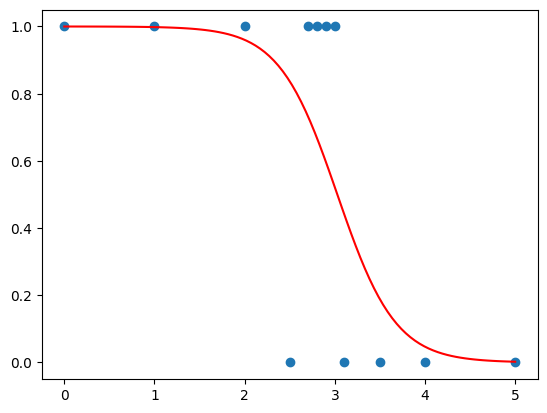

In [48]:
import matplotlib.pyplot as plt

X = torch.linspace(0, 5, 100).unsqueeze(1)
Y = torch.sigmoid(X@w+b).detach().numpy()

plt.scatter(x_train, y_train)
plt.plot(X, Y, c="red")
plt.show()

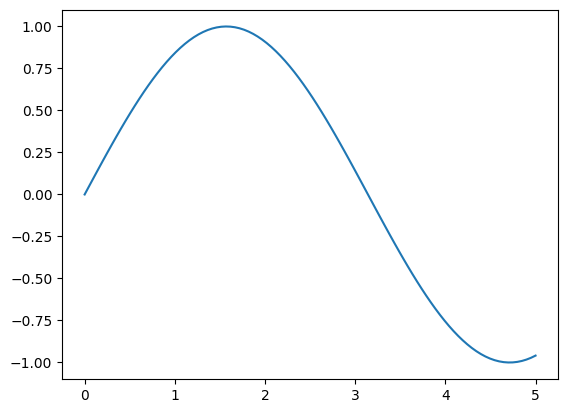

In [28]:
import math

X = [x.item() for x in torch.linspace(0, 5, 100)]
Y = [math.sin(x) for x in X]

plt.plot(X, Y)

In [29]:
from sklearn.linear_model import LogisticRegression

x_train = [[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]]
y_train = [1,1,1,0,0,0,0,1,0,1,1,1]

model = LogisticRegression(penalty=None)
model.fit(x_train, y_train)

print(model.coef_, model.intercept_)

x_test = [[4.5],[1.1]]
res = model.predict(x_test)
print(res)

[[-3.10385806]] [9.39776831]
[0 1]


dataScience5.1practice

In [32]:
import torch

x_train = torch.FloatTensor([[1,2,1,1],[2,1,3,2],[3,1,3,4],[4,1,5,5],[1,7,5,5],[1,2,5,6],[1,6,6,6],[1,7,7,7]])
y_train = torch.FloatTensor([[0,0,1],[0,0,1],[0,0,1],[0,1,0],[0,1,0],[0,1,0],[1,0,0],[1,0,0]])

W = torch.randn(4,3,requires_grad=True)
b = torch.randn(1,3,requires_grad=True)

optim = torch.optim.Adam([W,b],lr=0.1)

for epoch in range(3001):
  h = torch.softmax(torch.mm(x_train,W)+b,dim=1)
  cost = -torch.mean(torch.sum(y_train*torch.log(h),dim=1))

  # h = (torch.mm(x_train,w)+b).softmax(dim=1)
  # cost = -(y_train*torch.log(h)).sum(dim=1).mean()

  optim.zero_grad()
  cost.backward()
  optim.step()

  with torch.no_grad():
    if epoch % 100 == 0:
      print("epoch: {}, cost: {:.6f}".format(epoch, cost.item()))


epoch: 0, cost: 6.924340
epoch: 100, cost: 0.407624
epoch: 200, cost: 0.274345
epoch: 300, cost: 0.195013
epoch: 400, cost: 0.145140
epoch: 500, cost: 0.112143
epoch: 600, cost: 0.089195
epoch: 700, cost: 0.072573
epoch: 800, cost: 0.060141
epoch: 900, cost: 0.050599
epoch: 1000, cost: 0.043117
epoch: 1100, cost: 0.037143
epoch: 1200, cost: 0.032297
epoch: 1300, cost: 0.028314
epoch: 1400, cost: 0.024999
epoch: 1500, cost: 0.022212
epoch: 1600, cost: 0.019846
epoch: 1700, cost: 0.017820
epoch: 1800, cost: 0.016072
epoch: 1900, cost: 0.014553
epoch: 2000, cost: 0.013226
epoch: 2100, cost: 0.012059
epoch: 2200, cost: 0.011027
epoch: 2300, cost: 0.010111
epoch: 2400, cost: 0.009294
epoch: 2500, cost: 0.008563
epoch: 2600, cost: 0.007905
epoch: 2700, cost: 0.007312
epoch: 2800, cost: 0.006775
epoch: 2900, cost: 0.006288
epoch: 3000, cost: 0.005844


In [52]:
x_test = torch.tensor([[1,11,10,9], [1,3,4,3], [1,1,0,1]], dtype=torch.float)

h_test = torch.softmax(torch.mm(x_test,W)+b,dim=1)
print(h_test)
print(torch.argmax(h_test, dim=1))

tensor([[1.0000e+00, 2.3580e-25, 0.0000e+00],
        [1.0000e+00, 6.2225e-07, 8.8898e-17],
        [1.7031e-11, 4.8124e-01, 5.1876e-01]], grad_fn=<SoftmaxBackward0>)
tensor([0, 0, 2])


In [51]:
w.requires_grad_(False)
b.requires_grad_(False)

x_test = torch.FloatTensor([[1,11,10,9], [1,3,4,3], [1,1,0,1]])
test_all = torch.softmax(torch.mm(x_test,W)+b,dim=1)
print(test_all)
print(torch.argmax(test_all, dim=1))

tensor([[1.0000e+00, 2.3580e-25, 0.0000e+00],
        [1.0000e+00, 6.2225e-07, 8.8898e-17],
        [1.7031e-11, 4.8124e-01, 5.1876e-01]], grad_fn=<SoftmaxBackward0>)
tensor([0, 0, 2])


In [53]:
import torch
import torch.nn.functional as F
import torch.nn as nn

x_train = torch.FloatTensor([[1,2,1,1],[2,1,3,2],[3,1,3,4],[4,1,5,5],[1,7,5,5],[1,2,5,6],[1,6,6,6],[1,7,7,7]])
y_train = torch.LongTensor([2,2,2,1,1,1,0,0])

# W = torch.randn(4,3,requires_grad=True)
# b = torch.randn(1,3,requires_grad=True)
# optim = torch.optim.Adam([W,b],lr=0.1)

model = nn.Linear(4,3)
optim = torch.optim.Adam(model.parameters(), lr=0.1)

for epoch in range(3001):

  # h = torch.mm(x_train, W)+b
  h = model(x_train)
  cost = F.cross_entropy(h, y_train)

  optim.zero_grad()
  cost.backward()
  optim.step()

  with torch.no_grad():
    if epoch % 100 == 0:
      print(epoch, cost.item())


0 2.835744857788086
100 0.339946985244751
200 0.22497659921646118
300 0.15668633580207825
400 0.11526291072368622
500 0.08841975778341293
600 0.06997993588447571
700 0.05673752352595329
800 0.04689701646566391
900 0.039382386952638626
1000 0.03351340442895889
1100 0.028841722756624222
1200 0.025062108412384987
1300 0.02196059189736843
1400 0.019383681938052177
1500 0.017219077795743942
1600 0.015383020974695683
1700 0.013812068849802017
1800 0.012457321397960186
1900 0.011280826292932034
2000 0.01025253813713789
2100 0.009348634630441666
2200 0.008549831807613373
2300 0.007840465754270554
2400 0.007207768969237804
2500 0.006641133222728968
2600 0.006131760776042938
2700 0.005672275088727474
2800 0.005256463773548603
2900 0.004879059735685587
3000 0.004535522311925888


In [54]:
import numpy as np
from sklearn.linear_model import LogisticRegression

x_train = np.array([[1,2,1,1],[2,1,3,2],[3,1,3,4],[4,1,5,5],[1,7,5,5],[1,2,5,6],[1,6,6,6],[1,7,7,7]])
y_train = np.array([2,2,2,1,1,1,0,0])

model = LogisticRegression(penalty=None)

model.fit(x_train, y_train)

x_test = np.array([[1,11,10,9],[1,3,4,3],[1,1,0,1]])

print(model.predict(x_test))

[0 1 2]
